### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
faturamento = [loja, loja2, loja3, loja4]

In [ ]:
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f'Faturamento loja1: {faturamento_loja}')
print(f'Faturamento loja2: {faturamento_loja2}')
print(f'Faturamento loja3: {faturamento_loja3}')
print(f'Faturamento loja4: {faturamento_loja4}')

Faturamento loja1: 1534509.12
Faturamento loja2: 1488459.06
Faturamento loja3: 1464025.03
Faturamento loja4: 1384497.58


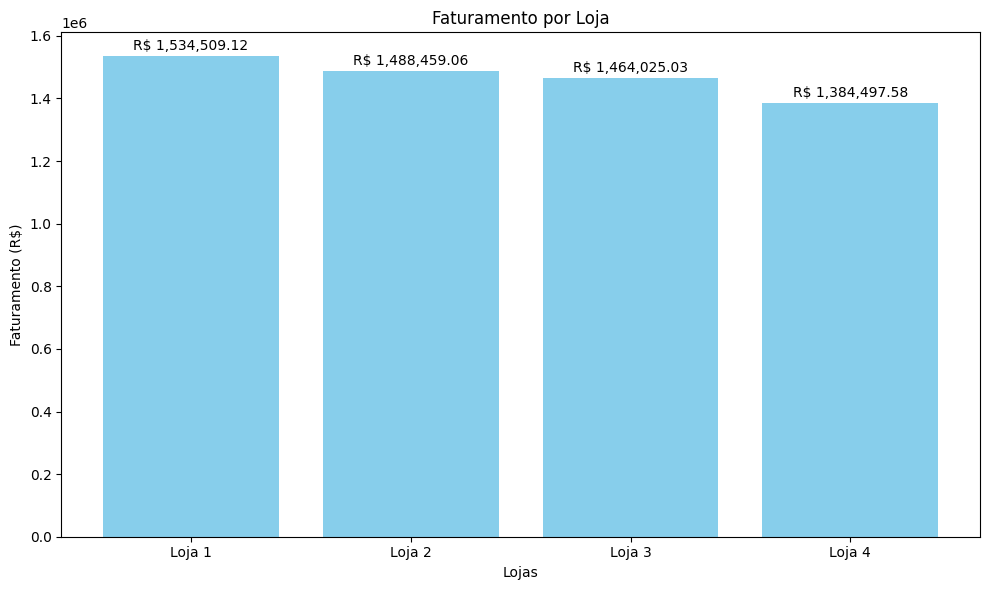

In [ ]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()

for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', va='bottom')


plt.show()

# 2. Vendas por Categoria


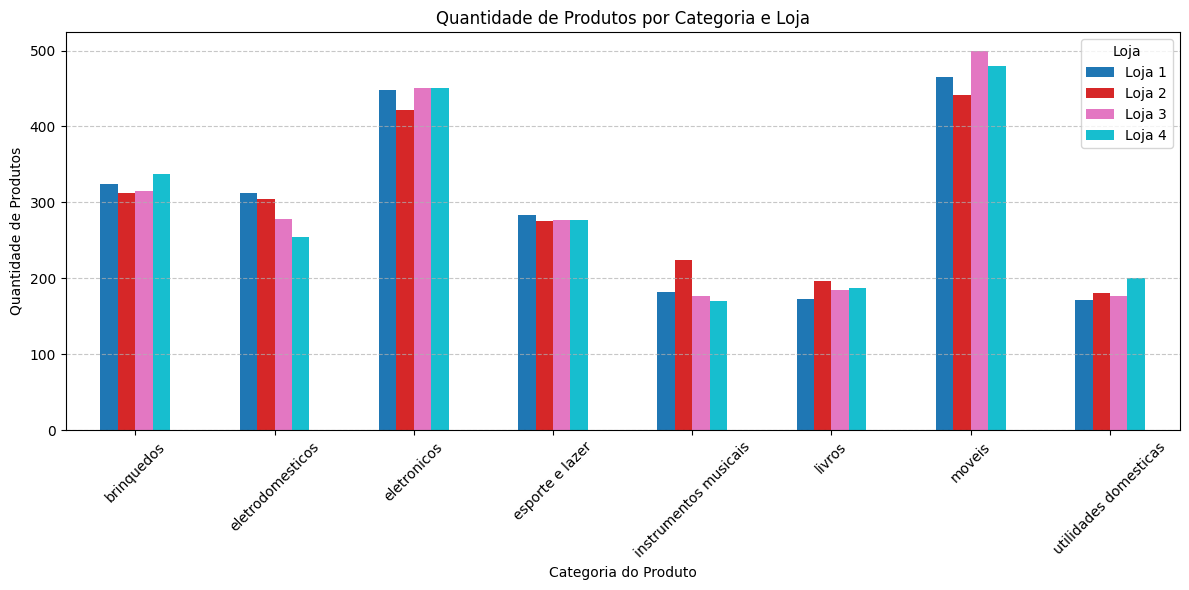

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados_totais = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

agrupado = dados_totais.groupby(['Categoria do Produto', 'Loja']).size().unstack(fill_value=0)

agrupado.plot(kind='bar', figsize=(12, 6), colormap='tab10')

plt.title('Quantidade de Produtos por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Produtos')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações']).round(2)

print(tabela_medias)
plt.show()

        Média de Avaliações
Loja 1                 3.98
Loja 2                 4.04
Loja 3                 4.05
Loja 4                 4.00


# 4. Produtos Mais e Menos Vendidos

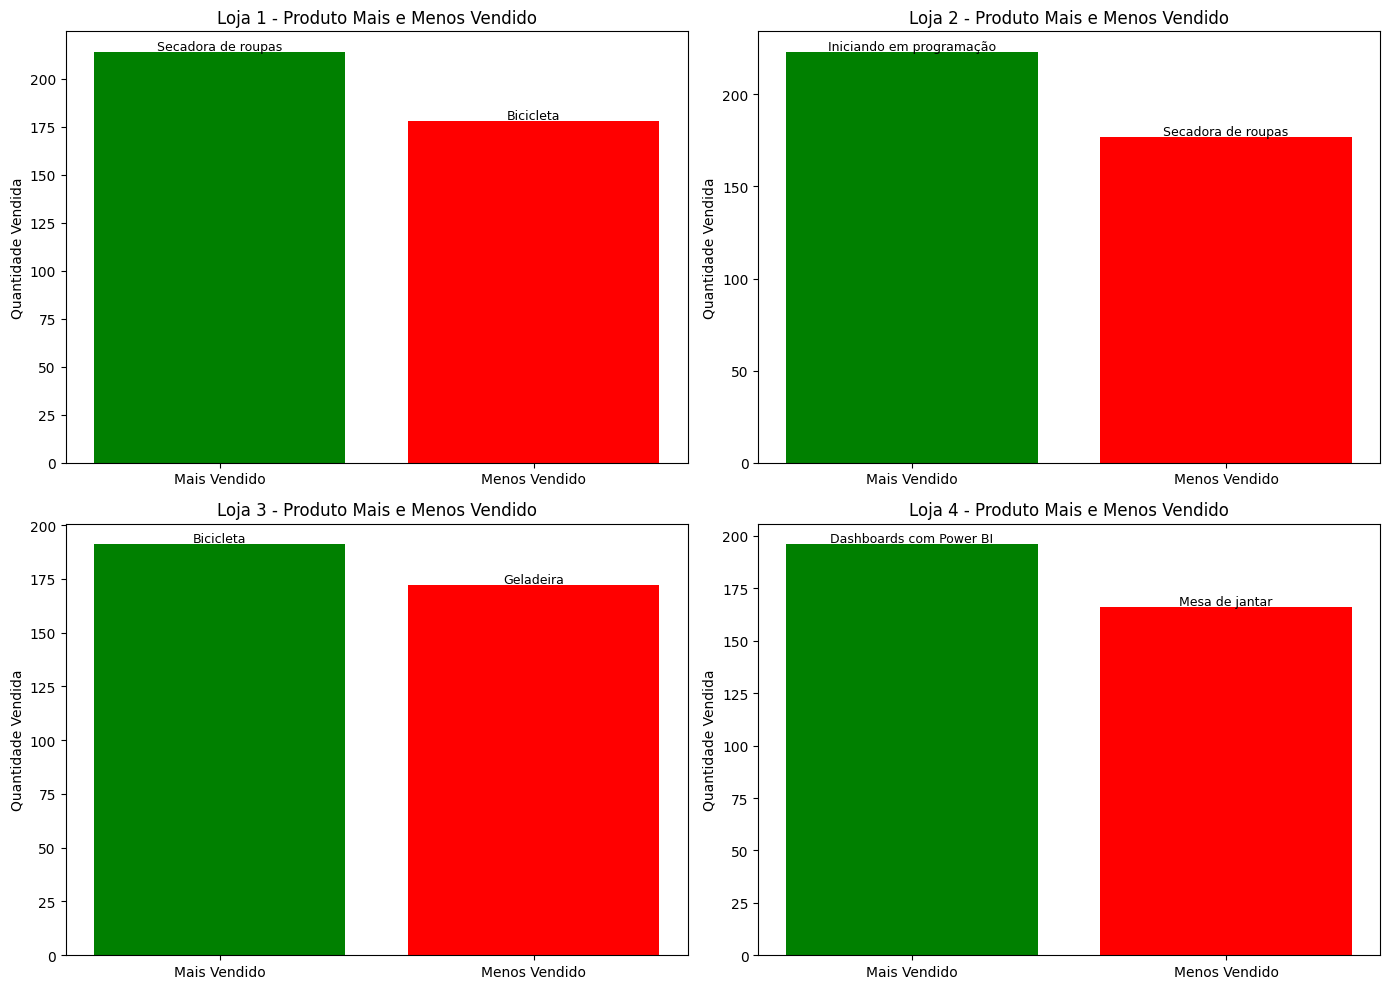

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


produtos_loja1_sorted = produtos_loja1.sort_values(by='Quantidade Vendida', ascending=False)
produtos_loja2_sorted = produtos_loja2.sort_values(by='Quantidade Vendida', ascending=False)
produtos_loja3_sorted = produtos_loja3.sort_values(by='Quantidade Vendida', ascending=False)
produtos_loja4_sorted = produtos_loja4.sort_values(by='Quantidade Vendida', ascending=False)


lojas_dados = [
    ('Loja 1', produtos_loja1_sorted),
    ('Loja 2', produtos_loja2_sorted),
    ('Loja 3', produtos_loja3_sorted),
    ('Loja 4', produtos_loja4_sorted)
]


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, (nome_loja, df_loja) in enumerate(lojas_dados):

    produtos = [df_loja.iloc[0]['Produto'], df_loja.iloc[-1]['Produto']]
    quantidades = [df_loja.iloc[0]['Quantidade Vendida'], df_loja.iloc[-1]['Quantidade Vendida']]
    cores = ['green', 'red']
    tipos = ['Mais Vendido', 'Menos Vendido']

    axs[i].bar(tipos, quantidades, color=cores)
    axs[i].set_title(f'{nome_loja} - Produto Mais e Menos Vendido')
    axs[i].set_ylabel('Quantidade Vendida')


    for j in range(2):
        axs[i].text(j, quantidades[j] + 1, produtos[j], ha='center', fontsize=9)

plt.tight_layout()
plt.show()




# 5. Frete Médio por Loja


In [ ]:
media_frete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

df_frete = pd.DataFrame(list(media_frete.items()), columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

print(df_frete)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


Conclusão

Com base na análise de faturamento das quatro lojas, observamos que a loja4 apresenta desempenho significativamente inferior em comparação às demais unidades. Apesar de comercializar os mesmos produtos da loja 2, seu faturamento é mais baixo, o que indica menor eficiência nas vendas. Além disso, embora tenha melhor desempenho na venda de itens mais baratos, isso não compensa a diferença de faturamento gerada pela menor margem desses produtos em relação aos de maior valor, mais vendidos nas outras lojas. Por fim, a média de avaliação dos clientes também se encontra abaixo da registrada por lojas com faturamento semelhante, o que pode indicar menor satisfação e impacto negativo na fidelização. Diante desses fatores, recomenda-se considerar a venda da loja como uma alternativa estratégica para o negócio.